In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#initialize
xgr = np.linspace(0, 49, 100)
zgr = -np.sqrt(xgr)

resolution = 30
max_depth = 3

temp_depth_grid = np.linspace(0, max_depth, resolution)
initial_temp = np.linspace(-5, 5, resolution)

thermal_matrix = np.zeros((xgr.shape[0], temp_depth_grid.shape[0]))

for i in range(len(thermal_matrix)):
    thermal_matrix[i,:] = initial_temp
    
gradient = np.gradient(zgr, xgr)

orientation = np.arctan(gradient) - 0.5 * np.pi
    
abs_x1 = np.tile(xgr, (len(temp_depth_grid), 1)).T + np.outer(np.cos(orientation), temp_depth_grid)
abs_z2 = np.tile(zgr, (len(temp_depth_grid), 1)).T + np.outer(np.sin(orientation), temp_depth_grid)

In [3]:
# apply boundary conditions
# ghost_nodes_temp = thermal_matrix[:,0]

# frozen_mask = (thermal_matrix[:,0]  self.config.thermal.T_melt)
# unfrozen_mask = np.ones(frozen_mask.shape) - frozen_mask

# print(ghost_nodes_temp.shape)
# print(ghost_nodes_temp)

# ghost_nodes_enth = frozen_mask * ghost_nodes_temp * self.config.thermal.c_frozen_soil + unfrozen_mask * ghost_nodes_temp * self.config.thermal.c_unfrozen_soil +

In [4]:
x = np.ones((3, 3))
y = np.zeros(3)

In [5]:
np.column_stack((y, x))

array([[0., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 1., 1., 1.]])

In [6]:
import numpy as np
from scipy.spatial import ConvexHull

# Example 2D points
points = np.array([[0, 0],
                   [1, 2],
                   [2, 1],
                   [3, 4],
                   [4, 3],
                   [5, 1],
                   [6, 0]])

# Compute convex hull
hull = ConvexHull(points)

# # Extract top boundary vertices
# top_boundary_vertices = []
# for edge in hull.vertices:
#     if np.all(points[edge, 1] == np.max(points[hull.vertices, 1])):
#         top_boundary_vertices.append(edge)

# # Sort the top boundary vertices based on x-coordinate
# top_boundary_vertices = sorted(top_boundary_vertices, key=lambda x: points[x, 0])

# # Generate coordinates along the top boundary
# num_points = 10
# top_boundary_coordinates = []
# for i in range(len(top_boundary_vertices) - 1):
#     x0, y0 = points[top_boundary_vertices[i]]
#     x1, y1 = points[top_boundary_vertices[i + 1]]
#     xs = np.linspace(x0, x1, num_points, endpoint=False)
#     ys = np.linspace(y0, y1, num_points, endpoint=False)
#     top_boundary_coordinates.extend(zip(xs, ys))

# # Add the last vertex
# x_last, y_last = points[top_boundary_vertices[-1]]
# top_boundary_coordinates.append((x_last, y_last))

# # Convert to numpy array
# top_boundary_coordinates = np.array(top_boundary_coordinates)

# print(top_boundary_coordinates)

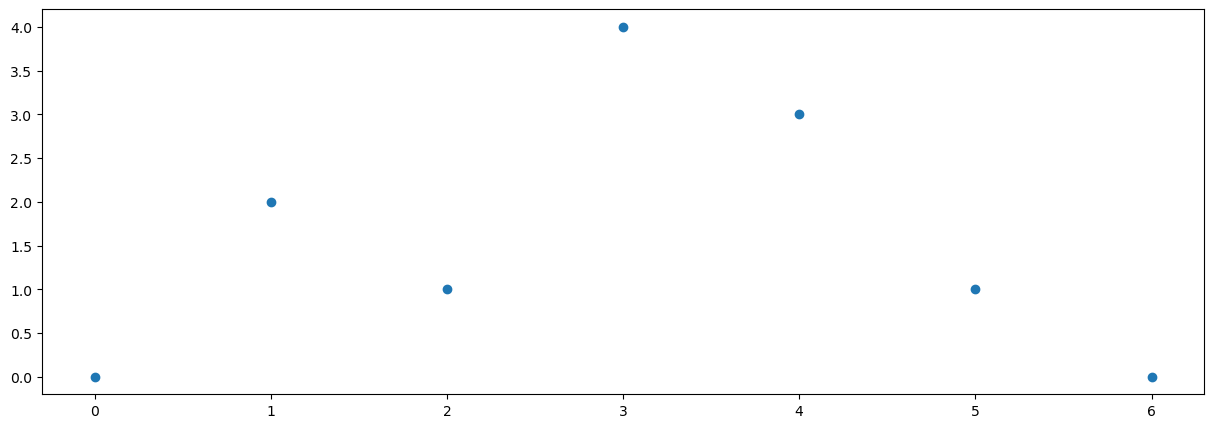

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(points[:,0], points[:,1])

In [8]:
# top_boundary_vertices = np.unique(hull.simplices[np.isin(hull.simplices, hull.vertices[hull.vertices[:, 1] == np.max(points[hull.vertices, 1])])])
import math

In [9]:
u = -5
v = -5
angle = math.atan2(u, v)

print(angle / (2*np.pi) * 360)

-135.0


In [10]:
def count_nonzero_until_zero(matrix):
    """Returns the number of grid points with a nonzero input, counted for each row from the lowest index until the first zero input.

    Args:
        matrix (np.array): a matrix

    Returns:
        result: number of grid points for each row before a zero input.
    """
    
    matrix = np.column_stack((matrix, np.zeros(matrix.shape[0])))
    
    indices = np.argmax(matrix == 0, axis=1)
    
    mask = (indices == matrix.shape[1]-1)
    
    indices[mask] = -1
    
    return indices


matrix = np.array([
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    ])

coords = np.arange(25).reshape((5, 5))

print(coords)

indices = count_nonzero_until_zero(matrix)

print(indices)

mask = (np.arange(len(indices)), indices)

print(coords[mask])



[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[ 1  0  2  4 -1]
[ 1  5 12 19 24]


In [11]:
from shapely.geometry import LineString

# Example LineString made up of x and y points
linestring = LineString([(0, 0), (1, 1), (2, 3), (3, 2)])

# Function to interpolate the y value for a given x value
def interpolate_y(linestring, x_value):
    # Check if the x_value is within the bounds of the LineString
    if x_value < linestring.xy[0][0] or x_value > linestring.xy[0][-1]:
        raise ValueError("x_value is outside the bounds of the LineString")
    
    # Find the index of the closest point on the LineString to the given x_value
    closest_index = min(range(len(linestring.coords)), key=lambda i: abs(linestring.coords[i][0] - x_value))
    
    # If the closest point is the last point, return the y value of that point
    if closest_index == len(linestring.coords) - 1:
        return linestring.coords[closest_index][1]
    
    # Interpolate the y value using linear interpolation
    x1, y1 = linestring.coords[closest_index]
    x2, y2 = linestring.coords[closest_index + 1]
    interpolated_y = y1 + (y2 - y1) * (x_value - x1) / (x2 - x1)
    
    return interpolated_y

# Example new x value
new_x_value = 2.5

# Interpolate the y value for the new x value
interpolated_y = interpolate_y(linestring, new_x_value)

print("Interpolated y value for x =", new_x_value, "is", interpolated_y)

Interpolated y value for x = 2.5 is 2.5


In [12]:
x = np.arange(5)
y = np.arange(5)

np.array((x, y)).T

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

In [13]:
# from shapely.geometry import Point, LineString

# def project_point_to_linestring(point, linestring):
#     # Get the coordinates of the given point
#     x, y = point.coords[0]
    
#     # Get the coordinates of the line segment endpoints
#     (x1, y1), (x2, y2) = linestring.coords
    
#     # Calculate the slope of the line segment
#     m = (y2 - y1) / (x2 - x1)
    
#     # Calculate the equation of the line perpendicular to the segment passing through the point
#     m_perpendicular = -1 / m if m != 0 else float('inf')  # Avoid division by zero
#     c_perpendicular = y - m_perpendicular * x
    
#     # Calculate the intersection point of the perpendicular line with the line segment
#     x_intersect = (c_perpendicular - m * x1 + y1) / (m - m_perpendicular)
#     y_intersect = m_perpendicular * x_intersect + c_perpendicular
    
#     # Return the coordinates of the intersection point
#     return Point(x_intersect, y_intersect)

# # Example usage
# linestring = LineString([(0, 0), (5, 5), (6, -2)])
# point = Point(2, 6)

# projected_point = project_point_to_linestring(point, linestring)
# print("Projected point:", projected_point)

In [14]:
def generate_perpendicular_grids(xgr, zgr, resolution=30, max_depth=3):
    """This function takes an xgrid and a zgrid, as well as a resolution and maximum depth, and returns a (temperature) grid perpendicular to the existing x and z-grid.
    ----------
    xgr: array
        1D array of x-values
    zgr: array
        1D array of z-values
    resolution: integer (default: 30)
        number of desired grid points in the 1D models
    max_depth: float (default: 3)
        maximum depth to be modelled
    ---------Returns----------
    Returns: x_matrix, z_matrix
    
    x_matrix: array
        2D array of x-values. Each row contains the x-values for a 1D model
    z_matrix: array
        2D array of z-values. Each row contains the z-values for a 1D model
    """
    temp_depth_grid = np.linspace(0, max_depth, resolution)
    initial_temp = np.linspace(-5, 5, resolution)

    thermal_matrix = np.zeros((xgr.shape[0], temp_depth_grid.shape[0]))

    for i in range(len(thermal_matrix)):
        thermal_matrix[i,:] = initial_temp
        
    gradient = np.gradient(zgr, xgr)

    orientation = np.arctan(gradient) - 0.5 * np.pi
        
    x_matrix = np.tile(xgr, (len(temp_depth_grid), 1)).T + np.outer(np.cos(orientation), temp_depth_grid)
    z_matrix = np.tile(zgr, (len(temp_depth_grid), 1)).T + np.outer(np.sin(orientation), temp_depth_grid)
    
    return x_matrix, z_matrix




In [15]:
os.chdir('..')
print(os.getcwd())

c:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model


In [16]:
xgr = np.loadtxt(Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/thermo-morphological-model/database/initial_conditions/bathy_grid.txt"))
zgr = np.loadtxt(Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/thermo-morphological-model/database/initial_conditions/bathy.txt"))

In [17]:
abs_x1, abs_z2 = generate_perpendicular_grids(xgr, zgr)

(-200.0, 0.0)

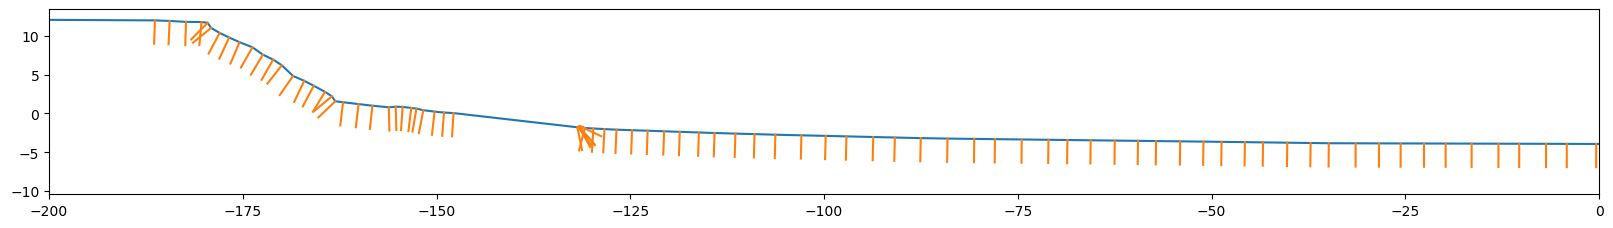

In [18]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(xgr, zgr)

for x_coords, z_coords in zip(abs_x1, abs_z2):
    ax.plot(x_coords, z_coords, color='C1')
    
ax.set_aspect('equal')
ax.set_xlim((-200, -0))

In [19]:
try:
    float('hello world')
except ValueError:
    print('failed')

failed


In [20]:
f = float(1)
i = int(1)

f == i

True

In [22]:
i = 1

if i:
    print('hello world')

hello world
